In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/sample_data/kc_house_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#change the date format
def change_date_format(col):
  data[col] = pd.to_datetime(data[col], format = '%Y-%m-%d')
  return data

change_date_format('date').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

# New Section

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 23.2MB/s 
     |████████████████████████████████| 6.6MB 42.1MB/s 
     |████████████████████████████████| 15.4MB 261kB/s 


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

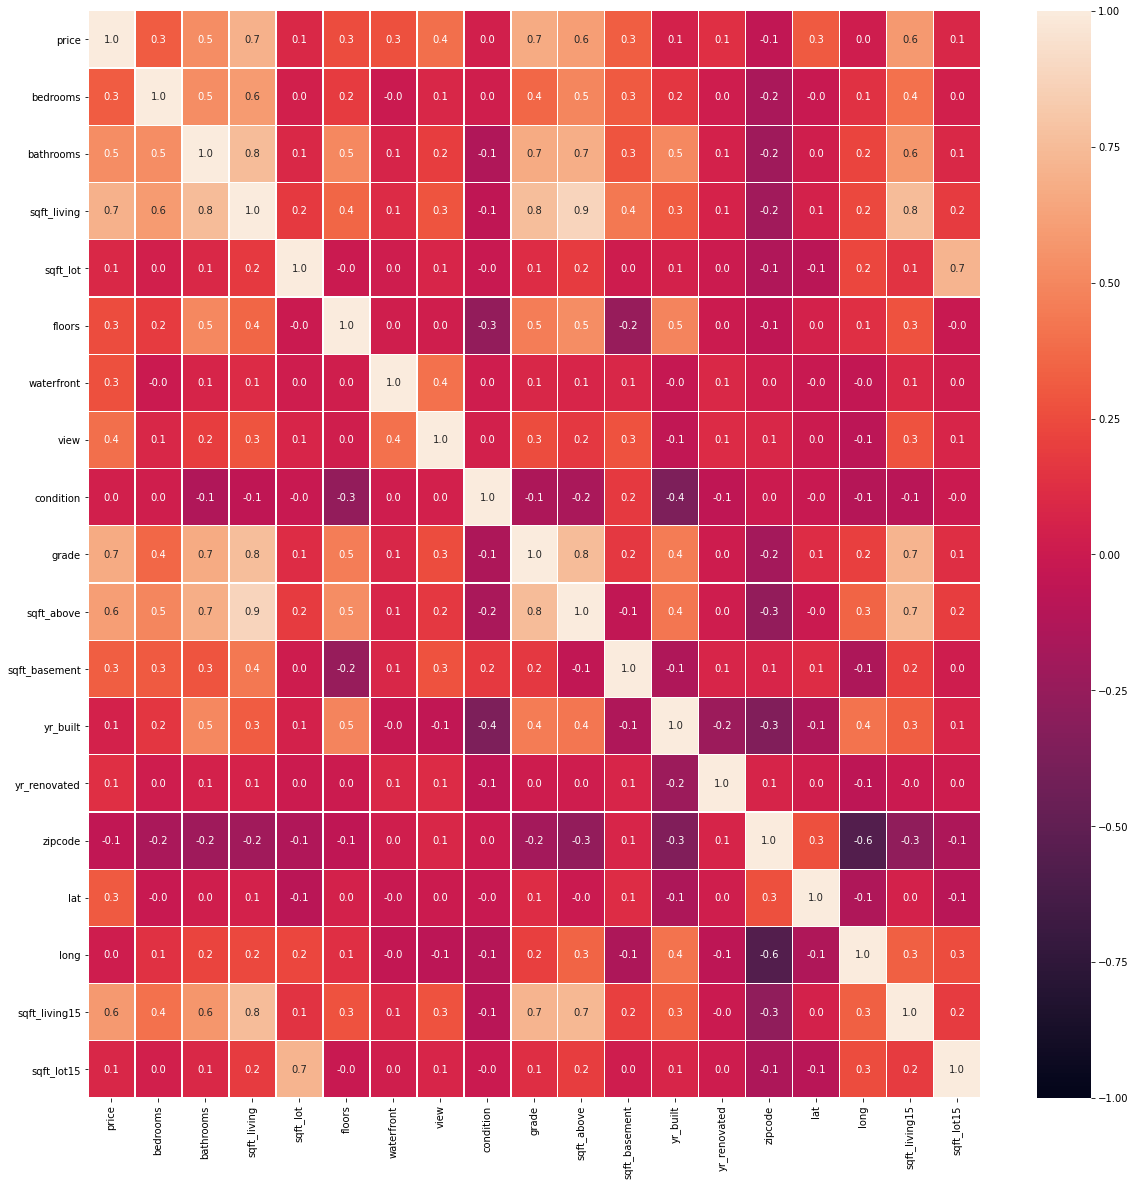

In [ ]:
data.drop(data[data['bedrooms'] == 0].index, inplace=True)
data.drop(data[data['bedrooms'] == 33].index, inplace=True)
data.drop(data[data['bathrooms']==0].index, inplace=True)
data.shape

# corrTable = data.corr()

# fig, ax = plt.subplots(figsize= (20,20))
# ax = sns.heatmap(corrTable, annot=True)
# plt.show()

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data.drop('id',axis=1).corr(), annot=True, linewidths=.3, fmt='.1f', ax=ax, vmin=-1.0, vmax=1.0)
plt.show()

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



calc_vif(data.drop(columns=['date','price']))
#sqft living, above, basement seem to be perfect collinearity.

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,id,3.631240
1,bedrooms,1.703376
2,bathrooms,3.376685
3,sqft_living,inf
4,sqft_lot,2.101922
5,floors,1.953888
6,waterfront,1.204198
7,view,1.421333
8,condition,1.219919
9,grade,3.410750


In [ ]:
calc_vif(data.drop(columns=['date','sqft_above','price'])) #remove maybe sqft_above or living or basement check later

,variables,VIF
0,id,3.631240
1,bedrooms,1.703376
2,bathrooms,3.376685
3,sqft_living,6.113198
4,sqft_lot,2.101922
5,floors,1.953888
6,waterfront,1.204198
7,view,1.421333
8,condition,1.219919
9,grade,3.410750


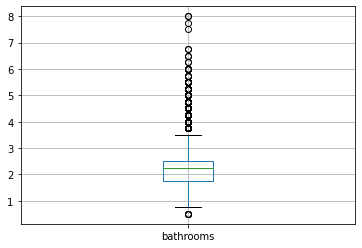

In [ ]:
data.boxplot(['bathrooms'])
#might remove outliers

In [ ]:
# map based on waterfront
import geopandas as gpd
from shapely.geometry import Point

# commented out cuz uploading the data is too much work, and 
'''
crs = {'init': 'epsg:4326'}

street_map = gpd.read_file('/content/sample_data/Street_Address___st_address_line.shp')
fig, ax = plt.subplots(figsize=(150,150))

geometry = [Point(xy) for xy in zip( data['long'], data['lat'] )]
geo_data = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_data.plot(ax = ax, markersize = 5, column='waterfront',cmap='viridis', legend = True)
#ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
plt.savefig('pricemaplegend.png')
'''

ModuleNotFoundError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.loc[:,~data.columns.isin(['price','date','sqft_above','id'])]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Return the coefficient of determination R^2 of the prediction.
lr = LinearRegression().fit(X_train, y_train)
price_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7123976202763923


In [ ]:
log_y = np.log(y)
lX_train, lX_test, log_y_train, log_y_test = train_test_split(X, log_y, test_size=0.2, random_state=0)

lr = LinearRegression().fit(lX_train, log_y_train)
price_pred = lr.predict(lX_test)
print(lr.score(lX_test,log_y_test))

0.7750800458955649


In [ ]:
print(lr.coef_)
#plt.scatter()
pd.DataFrame({"Feature":lX_train.columns.tolist(),"Coefficients":lr.coef_})

[-1.36590427e-02  6.71033113e-02  1.35780849e-04  4.25932287e-07
  7.47408267e-02  3.76290632e-01  6.13212178e-02  6.36771533e-02
  1.60038956e-01  1.52178582e-05 -3.34441173e-03  3.59877819e-05
 -6.54423734e-04  1.40007966e+00 -1.65286491e-01  1.01742155e-04
 -3.02958360e-07]


,Feature,Coefficients
0,bedrooms,-1.365904e-02
1,bathrooms,6.710331e-02
2,sqft_living,1.357808e-04
3,sqft_lot,4.259323e-07
4,floors,7.474083e-02
5,waterfront,3.762906e-01
6,view,6.132122e-02
7,condition,6.367715e-02
8,grade,1.600390e-01
9,sqft_basement,1.521786e-05


In [ ]:
from sklearn.linear_model import Ridge

for i in range(0,20):
  clf = Ridge(alpha = i*(0.2/20))
  rdg = clf.fit(X_train,y_train)
  print(i*(0.2/20), ":", rdg.score(X_test,y_test))

0.0 : 0.7123976202763532
0.01 : 0.7123974412121572
0.02 : 0.7123972618441057
0.03 : 0.7123970821723256
0.04 : 0.7123969021969498
0.05 : 0.7123967219181075
0.06 : 0.7123965413359306
0.07 : 0.7123963604505471
0.08 : 0.7123961792620884
0.09 : 0.7123959977706846
0.1 : 0.7123958159764658
0.11 : 0.712395633879561
0.12 : 0.712395451480101
0.13 : 0.7123952687782155
0.14 : 0.7123950857740331
0.15 : 0.7123949024676844
0.16 : 0.7123947188593003
0.17 : 0.7123945349490084
0.18 : 0.71239435073694
0.19 : 0.7123941662232235


In [ ]:
for i in range(0,20):
  clf = Ridge(alpha = i*(0.2))
  rdg = clf.fit(lX_train,log_y_train)
  predicted_log_price=clf.fit(lX_train,log_y_train).predict(lX_test)
  print(i*(0.2), ":", rdg.score(lX_test,log_y_test))
  
from sklearn.metrics import accuracy_score  


0.0 : 0.7750800458955529
0.2 : 0.7750824367902672
0.4 : 0.7750846875713925
0.6000000000000001 : 0.7750867989610907
0.8 : 0.7750887716771373
1.0 : 0.7750906064329519
1.2000000000000002 : 0.7750923039376418
1.4000000000000001 : 0.7750938648960265
1.6 : 0.7750952900086757
1.8 : 0.7750965799719471
2.0 : 0.7750977354780186
2.2 : 0.7750987572149167
2.4000000000000004 : 0.7750996458665567
2.6 : 0.7751004021127685
2.8000000000000003 : 0.7751010266293352
3.0 : 0.7751015200880231
3.2 : 0.7751018831566108
3.4000000000000004 : 0.7751021164989218
3.6 : 0.7751022207748579
3.8000000000000003 : 0.7751021966404257


In [ ]:
print(rdg.coef_)
#plt.scatter()
pd.DataFrame({"Feature":lX_train.columns.tolist(),"Coefficients":rdg.coef_})

[-1.38747786e-02  6.71603095e-02  1.35486121e-04  4.21515416e-07
  7.52289529e-02  3.63926346e-01  6.15615154e-02  6.34490665e-02
  1.60608881e-01  1.60833525e-05 -3.36917198e-03  3.58777934e-05
 -6.38362350e-04  1.38130588e+00 -1.60703399e-01  1.01849542e-04
 -3.06441890e-07]


,Feature,Coefficients
0,bedrooms,-1.387478e-02
1,bathrooms,6.716031e-02
2,sqft_living,1.354861e-04
3,sqft_lot,4.215154e-07
4,floors,7.522895e-02
5,waterfront,3.639263e-01
6,view,6.156152e-02
7,condition,6.344907e-02
8,grade,1.606089e-01
9,sqft_basement,1.608335e-05


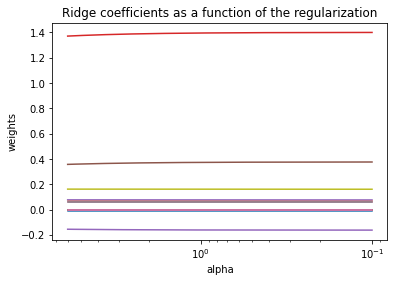

In [ ]:
from sklearn import linear_model
#alphas=np.logspace(-5,5,20)
alphas=np.arange(0.1,6, 0.01)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(lX_train,log_y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# reg = linear_model.RidgeCV(alphas=np.logspace(-10,-2,20))
# reg.fit(lX_train,log_y_train)
# reg.fit(lX_train,log_y_train).alpha_

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error

# ridge=Ridge()
# parameters= {'alpha':[x for x in [0,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1,3,3.2,3.4,3.6,4]]}

# ridge_reg=GridSearchCV(ridge, param_grid=parameters)
# ridge_reg.fit(lX_train, log_y_train)
# print("The best value of Alpha is: ",ridge_reg.best_params_)

[0.24907394553032688, 0.24907394545747796, 0.2490739453067462, 0.2490739449948644, 0.24907394434954985, 0.24907394301436037, 0.24907394025190702, 0.24907393453702859, 0.24907392271651158, 0.24907389827688284, 0.24907384778776692, 0.2490737436606035, 0.24907352966974713, 0.24907309314901116, 0.2490722166571232, 0.249070517038955, 0.24906748404367385, 0.24906324309552116, 0.24906286782747625, 0.24909547283520664]
18
0.24906286782747625


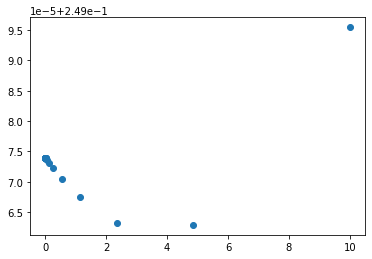

In [ ]:
from sklearn.metrics import mean_squared_error
rmse=[]
# check the below alpha values for Ridge Regression
#alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
alpha=np.logspace(-5,1,20)
for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(lX_train, log_y_train)
    predict=ridge.predict(lX_test)
    rmse.append(np.sqrt(mean_squared_error(predict, log_y_test)))
print(rmse)
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
print(rmse.argmin())
print(rmse.min())

0.1 0.2490732739621607
0.10985411419875583 0.24907320883156245
0.12067926406393285 0.24907313750048896
0.13257113655901093 0.24907305940286043
0.14563484775012436 0.24907297392607333
0.15998587196060582 0.24907288040833458
0.1757510624854792 0.2490727781361088
0.193069772888325 0.24907266634179398
0.21209508879201905 0.24907254420173575
0.2329951810515372 0.24907241083472828
0.2559547922699536 0.24907226530119797
0.281176869797423 0.24907210660329213
0.3088843596477481 0.2490719336861784
0.3393221771895328 0.24907174544090727
0.372759372031494 0.2490715407092834
0.4094915062380424 0.2490713182912988
0.44984326689694454 0.24907107695579941
0.49417133613238345 0.24907081545519857
0.5428675439323859 0.24907053254525122
0.5963623316594643 0.24907022701110018
0.6551285568595507 0.24906989770108454
0.7196856730011519 0.24906954357009622
0.7906043210907697 0.24906916373467328
0.8685113737513525 0.24906875754244187
0.9540954763499939 0.24906832465909
1.0481131341546859 0.2490678651766626
1.151

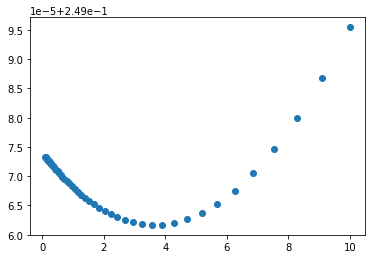

In [ ]:
# Adjust alpha based on previous result
#alpha=np.arange(0,5, 0.2)
alpha=np.logspace(-1,1,50)
rmse=[]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(lX_train, log_y_train)
    predict=ridge.predict(lX_test)
    print(alph, np.sqrt(mean_squared_error(predict, log_y_test)))
    rmse.append(np.sqrt(mean_squared_error(predict, log_y_test)))
    
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
print(rmse.argmin())
print(rmse.min())

In [ ]:
# one hot encode zipcodes

zip_dummies = pd.get_dummies(X, columns=['zipcode'], drop_first=True)
zip_dummies.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Linear regression with one hot encoded zipcodes and price

zip_X = zip_dummies.loc[:,~zip_dummies.columns.isin(['price','id','date'])]
zip_X_train, zip_X_test, y_train, y_test = train_test_split(zip_X, y, test_size=0.2, random_state=0)

lr = LinearRegression().fit(zip_X_train, y_train)
price_pred = lr.predict(zip_X_test)
print(lr.score(zip_X_test,y_test))

0.8243593368070945


In [ ]:
# Linear regression with one hot encoded zipcodes and log_price

zip_lX_train, zip_lX_test, log_y_train, log_y_test = train_test_split(zip_X, log_y, test_size=0.2, random_state=0)
lr = LinearRegression().fit(zip_lX_train, log_y_train)
price_pred = lr.predict(zip_lX_test)
print(lr.score(zip_lX_test,log_y_test))

0.880055296370813


In [ ]:
# Ridge regression... I think
# doesn't seem to be better than linear based on score?

#from sklearn.linear_model import Ridge

for i in range(1,20):
  clf = Ridge(alpha = i*(0.2/20))
  clf.fit(zip_lX_train,log_y_train)
  print(i*(0.2/20), ":", clf.score(zip_X_test,log_y_test))

0.01 : 0.8800519394546452
0.02 : 0.880048242377684
0.03 : 0.8800442376094689
0.04 : 0.8800399548052521
0.05 : 0.8800354210663264
0.06 : 0.8800306611751867
0.07 : 0.8800256978068881
0.08 : 0.8800205517192586
0.09 : 0.8800152419242788
0.1 : 0.8800097858426872
0.11 : 0.8800041994436132
0.12 : 0.8799984973708306
0.13 : 0.8799926930570272
0.14 : 0.8799867988273584
0.15 : 0.8799808259933629
0.16 : 0.8799747849382403
0.17 : 0.8799686851943543
0.18 : 0.8799625355137323
0.19 : 0.8799563439322563


In [ ]:
clf = Ridge(alpha = 1)
clf.fit(zip_lX_train,log_y_train)
print(i*(0.2/20), ":", clf.score(zip_lX_test,log_y_test))
print(clf)
print(clf.coef_)

0.19 : 0.8795309736514495
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
[ 3.45070484e-03  3.76882938e-02  1.94794954e-04  5.92097184e-07
 -2.82274009e-02  4.66752298e-01  5.88924626e-02  5.93520709e-02
  9.45793810e-02 -6.83838384e-05 -3.95518544e-04  4.11710868e-05
  1.06413076e+00 -2.62451038e-01  8.92096005e-05  1.96395229e-08
 -7.02102767e-02 -4.59295770e-02  7.31088592e-01  3.82436139e-01
  3.33849438e-01  2.90355297e-01  3.09204015e-01  2.33242162e-01
 -4.49655988e-02 -3.44941630e-02 -7.38686881e-02  1.65014103e-01
 -9.65449880e-02  1.93632785e-01  2.88610573e-01 -8.91688894e-02
  3.54324419e-01 -3.03594688e-02 -4.49543572e-02 -1.39252878e-01
  3.64053170e-01  7.27469500e-02  1.26352184e-01  7.99427813e-01
  5.36206565e-01 -4.10634134e-03  2.53635635e-01  2.32864832e-01
  2.06910427e-01 -5.03213041e-02  7.73334929e-02  4.65144907e-03
  1.30939298e-01  2.16968718e-01  1.18477450e-01  1.21419392e-0

In [ ]:
print(lr.coef_)

[ 3.55345469e-03  3.70843451e-02  1.95912582e-04  5.92592021e-07
 -3.07436283e-02  4.68147091e-01  5.85870305e-02  5.89851568e-02
  9.36375040e-02 -6.99666605e-05 -3.33183745e-04  4.17614451e-05
  5.62705706e-01 -3.68121425e-01  8.90901980e-05  2.34703810e-08
 -2.25644783e-02 -4.72680125e-03  9.39294490e-01  5.90754432e-01
  5.16552567e-01  5.01683808e-01  5.22528924e-01  3.19802392e-01
  2.28615865e-01  2.36559473e-01  2.15299727e-01  1.88628257e-01
 -6.41494873e-02  4.02554737e-01  4.63207114e-01  1.79740494e-01
  5.52706232e-01  5.06168077e-02  5.33018978e-02 -6.65188840e-02
  6.03056863e-01  3.28516917e-01  2.24862532e-01  1.02715752e+00
  7.13628094e-01  8.23238225e-02  4.34270478e-01  4.78823818e-01
  4.61944876e-01  7.46348024e-02  2.30176359e-01  1.29207307e-01
  2.79818236e-01  4.14807979e-01  1.96214979e-01  2.91380562e-01
  4.54256960e-01  4.67474959e-01  2.63819843e-01  6.74843306e-02
  7.27652306e-01  5.70745052e-01  7.18819109e-01  1.64700001e-01
  5.84290864e-01  1.92871

In [ ]:
print(zip_X_train.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode

In [ ]:
#zip_dummies2 = zip_dummies
#zip_dummies2['last_worked'] = ([zip_dummies2['yr_renovated'],zip_dummies2['yr_built']]).max()
#zip_dummies2.head()

In [ ]:
# Linear regression with sqft_living and price
sqft_X = np.log(zip_dummies['sqft_living'])
sqft_lX_train, sqft_lX_test, y_train, y_test = train_test_split(sqft_X, log_y, test_size=0.2, random_state=0)
sqft_lX_train = sqft_lX_train.values.reshape(-1,1)
sqft_lX_test = sqft_lX_test.values.reshape(-1,1)
lr = LinearRegression().fit(sqft_lX_train, y_train)
price_pred = lr.predict(sqft_lX_test)
print(lr.score(sqft_lX_test,y_test))

0.4673594871862819


In [ ]:
# Linear regression with sqft_living and price
sqft_X = np.log(zip_dummies['sqft_living'])
sqft_lX_train, sqft_lX_test, y_train, y_test = train_test_split(X, log_y, test_size=0.2, random_state=0)

sqft_lX_train = sqft_lX_train.values.reshape(-1,1)
sqft_lX_test = sqft_lX_test.values.reshape(-1,1)
lr = LinearRegression().fit(sqft_lX_train, y_train)
price_pred1 = lr.predict(sqft_lX_test)
print(lr.score(sqft_lX_test,y_test))

ValueError: ignored

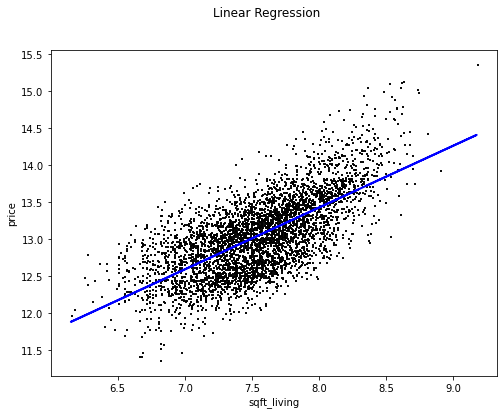

0.4673594871862819


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(sqft_lX_test, y_test, 1, marker=',', color = 'black')
plt.plot(sqft_lX_test, price_pred, color='blue', linewidth=2)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.suptitle("Linear Regression")
plt.show()
print(lr.score(sqft_lX_test,y_test))


In [ ]:
rdg = Ridge(alpha=3.6)
rdg1 = Ridge(alpha=1000)
rdg2 = Ridge(alpha=0.001)
rdg3 = Ridge(alpha=10000)
lX_train, log_y_train
rdg.fit(sqft_lX_train, y_train)
rdg1.fit(sqft_lX_train, y_train)
rdg2.fit(sqft_lX_train, y_train)
rdg3.fit(sqft_lX_train, y_train)
price_pred_rid = rdg.predict(sqft_lX_test)
price_pred_rid1 = rdg1.predict(sqft_lX_test)
price_pred_rid2 = rdg2.predict(sqft_lX_test)
price_pred_rid3 = rdg3.predict(sqft_lX_test)

In [ ]:
rdg = Ridge(alpha=3.6)
rdg1 = Ridge(alpha=1000)
rdg2 = Ridge(alpha=0.001)

rdg.fit(lX_train, log_y_train)
rdg1.fit(lX_train, log_y_train)
rdg2.fit(lX_train, log_y_train)

price_pred_rid = rdg.predict(lX_test)
price_pred_rid1 = rdg1.predict(lX_test)
price_pred_rid2 = rdg2.predict(lX_test)

In [ ]:
print(1-mean_squared_error(y_test, price_pred_rid, squared=False))

print(1-mean_squared_error(y_test, price_pred1, squared=False))

0.7509383328159682
0.7509260544015426


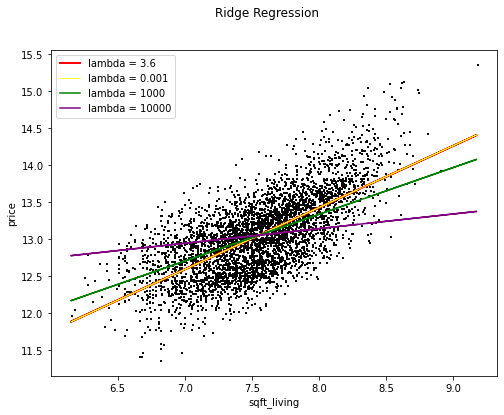

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(sqft_lX_test, y_test, 1, marker=',', color = 'black')
plt.plot(sqft_lX_test, price_pred_rid, color='red', linewidth=2,label = 'lambda = 3.6')
plt.plot(sqft_lX_test, price_pred_rid2, color='yellow', linewidth=0.8,label = 'lambda = 0.001')
plt.plot(sqft_lX_test, price_pred_rid1, color='green', linewidth=1.5, label = 'lambda = 1000')
plt.plot(sqft_lX_test, price_pred_rid3, color='purple', linewidth=1.5, label = 'lambda = 10000')
plt.legend()
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.suptitle("Ridge Regression")
plt.show()

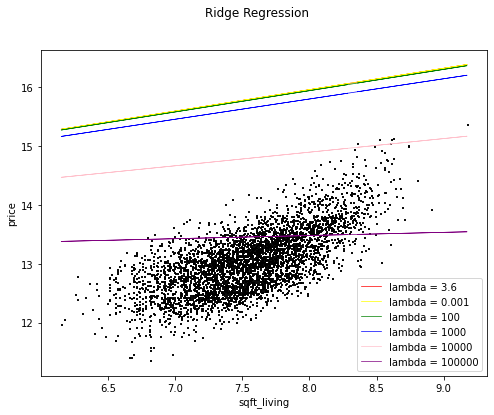

In [ ]:
alphas = [3.6, 0.001, 100, 1000, 10000, 100000]
colors = ['red', 'yellow', 'green','blue', 'pink', 'purple']

plt.figure(figsize=(8,6))
plt.scatter(sqft_lX_test, y_test, 1, marker=',', color = 'black')
# plt.plot(sqft_lX_test, price_pred_rid, color='red', linewidth=2,label = 'lambda = 3.6')
# plt.plot(sqft_lX_test, price_pred_rid2, color='yellow', linewidth=0.8,label = 'lambda = 0.001')
# plt.plot(sqft_lX_test, price_pred_rid1, color='green', linewidth=2, label = 'lambda = 1000000000')
# plt.legend()
# plt.xlabel("sqft_living")
# plt.ylabel("price")
# plt.suptitle("Ridge Regression")
# plt.show()

for i in range(len(alphas)):
  rdg = Ridge(alpha=alphas[i])
  rdg.fit(sqft_X_std_train, y_train)
  price_pred_rid = rdg.predict(sqft_lX_test)
  plt.plot(sqft_lX_test, price_pred_rid, color=colors[i], linewidth=0.7,label = 'lambda = ' + str(alphas[i]))

plt.legend()
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.suptitle("Ridge Regression")
plt.show()

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(zip_X)
scaler
zip_X.head*()

TypeError: ignored

In [ ]:
zip_X_std = scaler.transform(zip_X)

In [ ]:
zip_X_std.mean(axis=0)

array([ 1.11207374e-16,  5.26425439e-17,  1.18445724e-16, -2.10570175e-17,
       -5.26425439e-17,  3.15855263e-17,  0.00000000e+00,  1.05285088e-17,
        1.42134868e-16, -5.26425439e-18,  2.31627193e-15, -7.36995614e-17,
       -1.68660953e-14, -9.36352928e-14,  9.47565789e-17,  5.26425439e-18,
       -3.94819079e-18, -1.44766996e-17, -1.97409539e-18,  1.05285088e-17,
       -1.05285088e-17, -1.25026042e-17, -4.86943531e-17,  2.36891447e-17,
       -5.13264803e-17, -1.84248904e-17,  1.38186678e-17, -5.92228618e-18,
       -2.63212719e-18,  3.25725740e-17,  1.31606360e-17, -4.70492736e-17,
       -3.61917489e-18,  3.75078125e-17, -7.23834978e-18, -1.64507950e-17,
        1.44766996e-17,  4.73782895e-17,  2.30311129e-17,  1.05285088e-17,
       -2.89533991e-17,  4.19495271e-17, -1.71088268e-17, -1.97409539e-18,
       -3.88238761e-17,  1.28316201e-17, -9.21244518e-18, -3.68497807e-17,
       -2.63212719e-18, -2.63212719e-18,  1.97409539e-17, -7.89638158e-18,
       -3.61917489e-18,  

In [ ]:
zip_X_std.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
zip_X_std_train, zip_X_std_test, y_train, y_test = train_test_split(zip_X_std, log_y, test_size=0.2, random_state=0)
lr = LinearRegression().fit(zip_X_std_train, y_train)
price_pred = lr.predict(zip_X_std_test)
print(lr.score(zip_X_std_test,y_test))


0.8800552963691533


In [ ]:
for i in range(1,20):
  clf = Ridge(alpha = i*(0.2/20))
  clf.fit(zip_X_std_train,log_y_train)
  print(i*(0.2/20), ":", clf.score(zip_X_std_test,log_y_test))

0.01 : 0.8800552581551726
0.02 : 0.8800552198697498
0.03 : 0.88005518151299
0.04 : 0.8800551430849978
0.05 : 0.8800551045858781
0.06 : 0.8800550660157354
0.07 : 0.8800550273746743
0.08 : 0.8800549886627991
0.09 : 0.8800549498802138
0.1 : 0.8800549110270223
0.11 : 0.8800548721033291
0.12 : 0.8800548331092369
0.13 : 0.8800547940448505
0.14 : 0.8800547549102723
0.15 : 0.8800547157056061
0.16 : 0.8800546764309549
0.17 : 0.8800546370864222
0.18 : 0.88005459767211
0.19 : 0.8800545581881216


In [ ]:
# standardize data
sqft_X_std = sqft_X.subtract(sqft_X.mean(axis=0))
sqft_X_std = sqft_X_std.divide(sqft_X.std(axis=0))

sqft_X_std_train, sqft_X_std_test, y_train, y_test = train_test_split(sqft_X_std, log_y, test_size=0.2, random_state=0)
sqft_X_std_train = sqft_X_std_train.values.reshape(-1,1)
sqft_X_std_test = sqft_X_std_test.values.reshape(-1,1)
lr = LinearRegression().fit(sqft_X_std_train, y_train)
price_pred = lr.predict(sqft_X_std_test)
print(lr.score(sqft_X_std_test,y_test))

0.49360612859256386


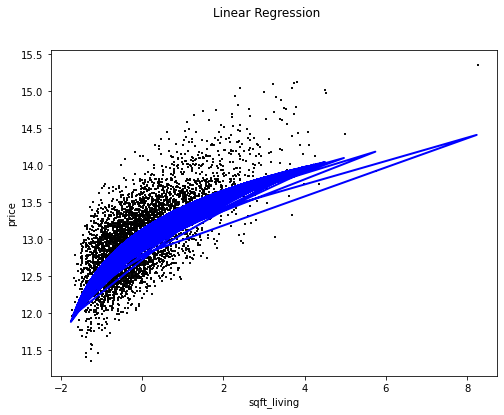

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(sqft_X_std_test, y_test, 1, marker=',', color = 'black')
plt.plot(sqft_X_std_test, price_pred, color='blue', linewidth=2)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.suptitle("Linear Regression")
plt.show()

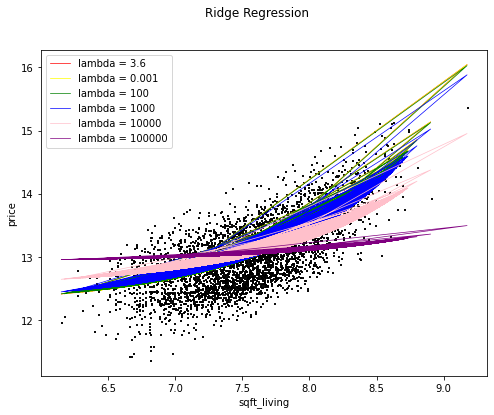

In [ ]:
alphas = [3.6, 0.001, 100, 1000, 10000, 100000]
colors = ['red', 'yellow', 'green','blue', 'pink', 'purple']

plt.figure(figsize=(8,6))
plt.scatter(sqft_lX_test, y_test, 1, marker=',', color = 'black')

for i in range(len(alphas)):
  rdg = Ridge(alpha=alphas[i])
  rdg.fit(sqft_X_std_train, y_train)
  price_pred_rid = rdg.predict(sqft_X_std_test)
  plt.plot(sqft_lX_test, price_pred_rid, color=colors[i], linewidth=0.7,label = 'lambda = ' + str(alphas[i]))

plt.legend()
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.suptitle("Ridge Regression")
plt.show()

In [ ]:
rdg = Ridge(alpha=3.3)


rdg.fit(sqft_X_std_train, y_train)

price_pred_rid = rdg.predict(sqft_X_std_test)
print(rdg.score(sqft_X_std_test,y_test))

0.46735807007528063


In [ ]:
alpha=np.logspace(-1,5,50)
rmse=[]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(sqft_X_std_train, y_train)
    predict=ridge.predict(sqft_X_std_test)
    print(alph, np.sqrt(mean_squared_error(predict, y_test)))
    rmse.append(np.sqrt(mean_squared_error(predict, y_test)))
    
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
print(rmse.argmin())
print(rmse.min())

NameError: ignored